# The effects of the Covid 19 in Argentina using Apache Spark: a comparative analisys between provinces.

We download "https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv" from "datos.gob.ar" using Pandas library.
Then we create a dataframe using Pyspark and we filter it taking into account only confirmed cases. Finally we divided the data between those who recovered and those who passed away.

*Beware: the Covid19Casos.csv file is 1,2gb it may take a while to download it.*

In [ ]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np
import string

pdDF = pd.read_csv('https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv')

In [3]:
import pandas as pd
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import numpy as np
import string

sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

df = spark.read.format('csv').option('header', True).load('Covid19Casos.csv')


In [5]:
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

#df = spark.createDataFrame(pdDF)

provincias = df.select('residencia_provincia_nombre','fallecido').where(col('clasificacion_resumen').like('Confirmado'))

In [7]:
provincias_list = list()

for provincia in provincias.select('residencia_provincia_nombre').collect():
    if provincia[0] not in provincias_list:
        provincias_list.append(provincia[0])

provincias_list.sort()
provincias_list.pop(16)

cantidad_contagiados = list()

for provincia in provincias_list:
    x = provincias.select('residencia_provincia_nombre').where(col('residencia_provincia_nombre').like(f'{provincia}')).count()
    cantidad_contagiados.append(x)

In [ ]:
y = np.arange(100000,900000, 200000)

plt.bar(provincias_list, cantidad_contagiados)
plt.gcf().set_size_inches(30, 15)
plt.title('Total de contagiados por provincia', fontdict= {'fontsize':40})
plt.xticks(provincias_list, fontsize = 10)
plt.yticks(y, fontsize =30)
plt.grid()
plt.show()

In [ ]:
provincias_fallecidos = provincias.select('residencia_provincia_nombre').where(col('fallecido').startswith('SI'))

cantidad_fallecidos = list()

for provincia in provincias_list:
    x = provincias_fallecidos.select('residencia_provincia_nombre').where(col('residencia_provincia_nombre').like(f'{provincia}')).count()
    cantidad_fallecidos.append(x)

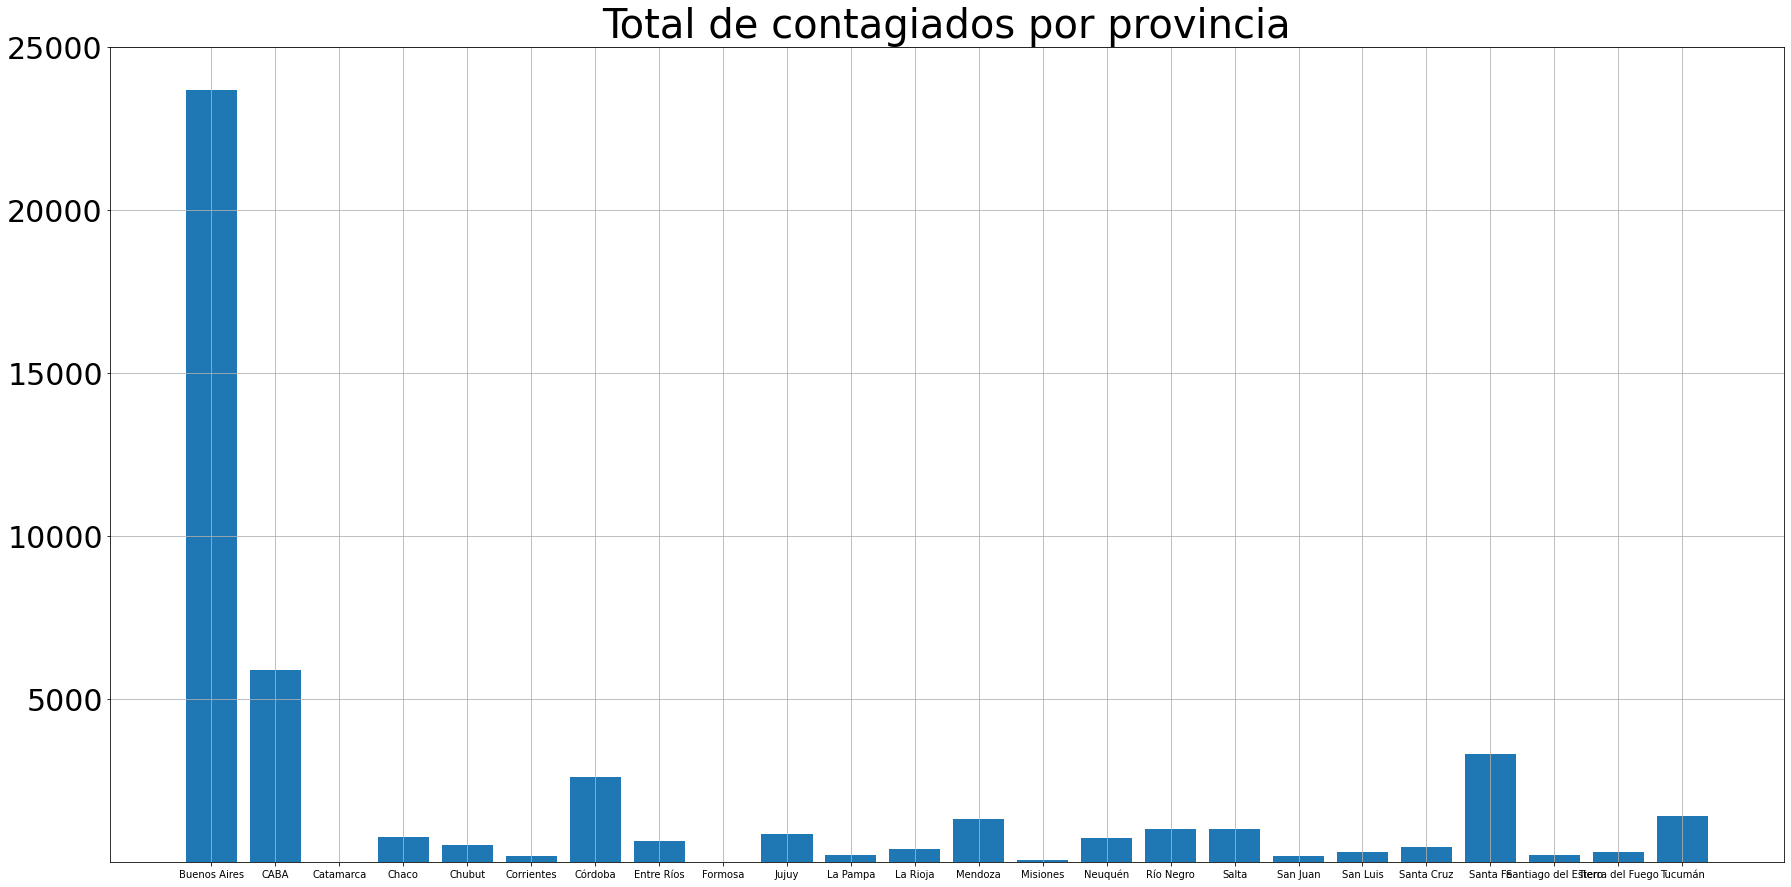

In [64]:
y = np.arange(5000,30000, 5000)

plt.bar(provincias_list, cantidad_fallecidos)
plt.gcf().set_size_inches(30, 15)
plt.title('Total de fallecidos por provincia', fontdict= {'fontsize':40})
plt.xticks(provincias_list, fontsize = 10)
plt.yticks(y, fontsize =30)
plt.grid()
plt.show()